## Discovery prototype for generating 2D colored noise

- Based on the 1-d generator in the colorednoise package
- See also: https://stackoverflow.com/questions/70085015/how-to-generate-2d-colored-noise#comment123897644_70088244

Known Problems: 
- rfftn does the faster real-valued fft only over last axis!
- Other axes are transformed with normal fft
- Therefore the noise-generation part is not entirely correct yet

In [1]:
%matplotlib ipympl
#%load_ext autoreload
#%autoreload 2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#import colorednoise as cn

In [3]:
from matplotlib import mlab
from matplotlib import pylab as plt

In [4]:
from numpy import sqrt, newaxis
from numpy.fft import irfft, rfftfreq
from numpy.random import normal
from numpy import sum as npsum

In [5]:
from numpy.fft import irfftn, irfftn, irfft2, irfft2, rfftn

In [6]:
exponent = 1.5
size = np.array([500,1000])

# The number of samples in each time series
#samples = size[-1]
fmin = 1./size

# Calculate Frequencies (we asume a sample rate of one)
# Use fft functions for real output (-> hermitian spectrum)
f = [rfftfreq(l)  for l in size]

# Build scaling factors for all frequencies
## use constant value for frequency below cutoff 
for i in range(len(size)):
    ix = npsum(f[i] < fmin[i])
    f[i][:ix] = f[i][min(ix, len(f[i])-1)]

exponent = np.reshape(exponent, np.array(exponent).shape + (1,) * len(f))

# 1 / (fx**exponent + fy**exponent + ...)
s_scale = 1 / np.sum(
    np.array(np.meshgrid(*f))**exponent, 
    axis=0
)

# Adjust size to generate one Fourier component per frequency
fftsize = s_scale.shape

# Add empty dimension(s) to broadcast s_scale along last
# dimension of generated random power + phase (below)
#dims_to_add = len(size) - 1
#s_scale     = s_scale[(newaxis,) * dims_to_add + (Ellipsis,)]

# Generate scaled random power + phase
sr = normal(scale=s_scale, size=fftsize)
si = normal(scale=s_scale, size=fftsize)

s  = sr + 1J * si

# Combine power + corrected phase to Fourier components
s  = sr + 1J * si

# Transform to real time series & scale to unit variance
y = irfftn(s)#, s=size)# / sigma

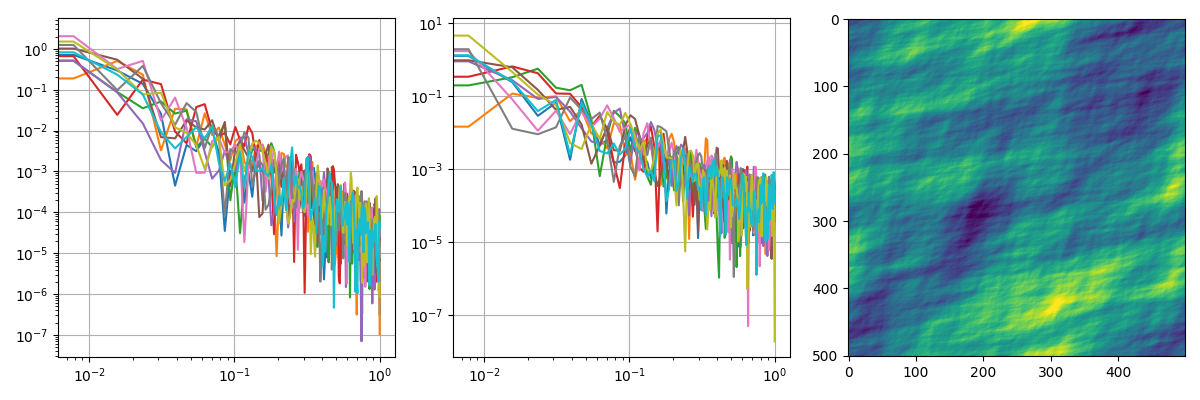

In [7]:
plt.close(2)
fig, ax = plt.subplots(ncols=3,num=2, figsize=(12,4))

for i in np.linspace(0,y.shape[0]-1, 10, dtype=int):
    psds, psdf = mlab.psd(y[i,:], NFFT=2**8)
    ax[0].loglog(psdf,psds)
    ax[0].grid(True)

for i in np.linspace(0,y.shape[1]-1, 10, dtype=int):
    psds, psdf = mlab.psd(y[:,i], NFFT=2**8)
    ax[1].loglog(psdf,psds)
    #ax[1].imshow(np.log(s_scale))
    ax[1].grid(True)
    
vmax = 3*np.std(y)
ax[2].imshow(y[:,:], vmin=-vmax, vmax=vmax)#, aspect='auto')
fig.tight_layout()

# A general test of rfftn for finding out how it works

[ 50 100] (100, 50) 51 26


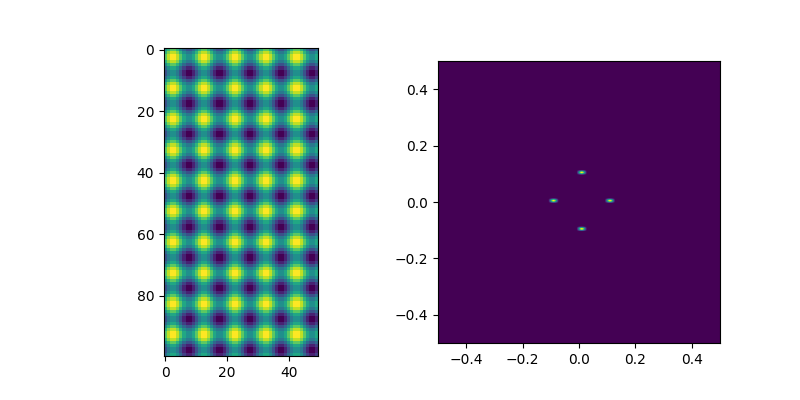

In [8]:
size = np.array([50,100])
X, Y = np.meshgrid(np.arange(size[0]), np.arange(size[1]))
f = 10 * np.pi / size[0]
Z = np.sin(X*f) + np.sin(Y*f)
fx = np.fft.rfftfreq(size[1])
fy = np.fft.rfftfreq(size[0])
Zfft = np.fft.fftn(Z)
print(size, Zfft.shape, len(fx), len(fy))
plt.close(10)
fig, ax = plt.subplots(ncols=2, figsize=(8,4), num=10)
ax[0].imshow(Z)
ax[1].imshow(np.abs(np.fft.fftshift(Zfft))**2, extent=[-.5,0.5,-.5,0.5], aspect='equal', origin='lower')
#ax[1].imshow(np.abs(Zfft)**2, aspect='equal', origin='lower')
#extent=[0,0.5,0,0.5],